In [8]:
import pandas as pd
import sportsreference as sportsreference
from pprint import pprint
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

Requirement already up-to-date: sklearn in c:\users\treyg\anaconda3\lib\site-packages (0.0)


In [2]:
from sportsreference.nfl.teams import Teams

df=pd.DataFrame()   
teams = []
years = []
for i in range(2002, 2020):
    
    teams = Teams(i)
    for team in teams:
        df = df.append(team.dataframe)
        years.append(i)
    
df["years"]=years
df

,abbreviation,defensive_simple_rating_system,first_downs,first_downs_from_penalties,fumbles,games_played,interceptions,losses,margin_of_victory,name,...,rush_yards_per_attempt,simple_rating_system,strength_of_schedule,turnovers,win_percentage,wins,yards,yards_from_penalties,yards_per_play,years
KAN,KAN,-2.3,343,24,2,16,13,8,4.3,Kansas City Chiefs,...,5.1,6.1,1.9,15,0.500,8,6000,700,6.2,2002
RAI,RAI,4.3,366,27,9,16,10,5,9.1,Oakland Raiders,...,4.3,10.6,1.5,19,0.688,11,6237,1094,5.8,2002
NOR,NOR,-3.3,291,31,15,16,15,7,2.8,New Orleans Saints,...,4.1,2.4,-0.3,30,0.563,9,5205,911,5.2,2002
PHI,PHI,3.8,311,23,13,16,11,4,10.9,Philadelphia Eagles,...,4.5,8.3,-2.6,24,0.750,12,5604,897,5.2,2002
ATL,ATL,1.5,316,30,15,16,12,6,5.5,Atlanta Falcons,...,4.5,5.1,-0.4,27,0.594,9,5535,931,5.3,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEN,DEN,2.7,279,40,6,16,10,9,-2.1,Denver Broncos,...,4.1,-2.1,0.0,16,0.438,7,4777,912,5.0,2019
CHI,CHI,4.5,297,34,7,16,12,8,-1.1,Chicago Bears,...,3.7,-0.9,0.2,19,0.500,8,4749,838,4.7,2019
CIN,CIN,-2.9,312,36,14,16,16,14,-8.8,Cincinnati Bengals,...,3.9,-7.3,1.5,30,0.125,2,5169,761,4.9,2019
NYJ,NYJ,-0.6,253,30,9,16,16,9,-5.2,New York Jets,...,3.3,-6.3,-1.1,25,0.438,7,4368,1105,4.6,2019


In [3]:
for col in df.columns:
    print(col)

abbreviation
defensive_simple_rating_system
first_downs
first_downs_from_penalties
fumbles
games_played
interceptions
losses
margin_of_victory
name
offensive_simple_rating_system
pass_attempts
pass_completions
pass_first_downs
pass_net_yards_per_attempt
pass_touchdowns
pass_yards
penalties
percent_drives_with_points
percent_drives_with_turnovers
plays
points_against
points_contributed_by_offense
points_difference
points_for
post_season_result
rank
rush_attempts
rush_first_downs
rush_touchdowns
rush_yards
rush_yards_per_attempt
simple_rating_system
strength_of_schedule
turnovers
win_percentage
wins
yards
yards_from_penalties
yards_per_play
years


In [4]:
#offense only df
Offense_df = df[['years', 'abbreviation', 'yards', 'margin_of_victory', 'offensive_simple_rating_system', 'pass_attempts', 'pass_completions', 'pass_first_downs', 'pass_net_yards_per_attempt', 'pass_touchdowns', 'pass_yards', 'percent_drives_with_turnovers', 'percent_drives_with_points', 'plays', 'points_contributed_by_offense', 'rank', 'rush_attempts', 'rush_first_downs', 'rush_yards_per_attempt', 'turnovers', 'win_percentage', 'yards_per_play', 'first_downs']]
Offense_df

,years,abbreviation,yards,margin_of_victory,offensive_simple_rating_system,pass_attempts,pass_completions,pass_first_downs,pass_net_yards_per_attempt,pass_touchdowns,...,plays,points_contributed_by_offense,rank,rush_attempts,rush_first_downs,rush_yards_per_attempt,turnovers,win_percentage,yards_per_play,first_downs
KAN,2002,KAN,6000,4.3,8.4,477,292,179,7.2,27,...,965,145.45,1,462,140,5.1,15,0.500,6.2,343
RAI,2002,RAI,6237,9.1,6.3,619,418,226,6.8,26,...,1069,123.35,2,414,113,4.3,19,0.688,5.8,366
NOR,2002,NOR,5205,2.8,5.8,538,291,169,6.0,27,...,1001,-77.44,3,426,91,4.1,30,0.563,5.2,291
PHI,2002,PHI,5604,10.9,4.5,548,318,164,5.8,27,...,1073,-15.34,4,489,124,4.5,24,0.750,5.2,311
ATL,2002,ATL,5535,5.5,3.5,479,268,163,6.1,18,...,1038,38.40,5,523,123,4.5,27,0.594,5.3,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEN,2019,DEN,4777,-2.1,-4.8,504,312,162,5.7,16,...,954,-14.61,28,409,77,4.1,16,0.438,5.0,279
CHI,2019,CHI,4749,-1.1,-5.4,580,371,178,5.3,20,...,1020,-41.05,29,395,85,3.7,19,0.500,4.7,297
CIN,2019,CIN,5169,-8.8,-4.4,616,356,191,5.5,18,...,1049,-60.73,30,385,85,3.9,30,0.125,4.9,312
NYJ,2019,NYJ,4368,-5.2,-5.7,521,323,162,5.4,19,...,956,-112.92,31,383,61,3.3,25,0.438,4.6,253


In [5]:
#defense only df
Defense_df = df[['years', 'abbreviation', 'defensive_simple_rating_system', 'interceptions', 'points_against']]
Defense_df

,years,abbreviation,defensive_simple_rating_system,interceptions,points_against
KAN,2002,KAN,-2.3,13,399
RAI,2002,RAI,4.3,10,304
NOR,2002,NOR,-3.3,15,388
PHI,2002,PHI,3.8,11,241
ATL,2002,ATL,1.5,12,314
...,...,...,...,...,...
DEN,2019,DEN,2.7,10,316
CHI,2019,CHI,4.5,12,298
CIN,2019,CIN,-2.9,16,420
NYJ,2019,NYJ,-0.6,16,359


In [6]:
#misc df
Misc_df = df[['years', 'abbreviation', 'fumbles', 'games_played', 'losses', 'name', 'first_downs_from_penalties', 'penalties', 'points_difference', 'points_for', 'post_season_result', 'simple_rating_system', 'strength_of_schedule', 'win_percentage', 'wins', 'yards_from_penalties']]
Misc_df

,years,abbreviation,fumbles,games_played,losses,name,first_downs_from_penalties,penalties,points_difference,points_for,post_season_result,simple_rating_system,strength_of_schedule,win_percentage,wins,yards_from_penalties
KAN,2002,KAN,2,16,8,Kansas City Chiefs,24,75,68,467,None,6.1,1.9,0.500,8,700
RAI,2002,RAI,9,16,5,Oakland Raiders,27,129,146,450,Lost Conference Championship,10.6,1.5,0.688,11,1094
NOR,2002,NOR,15,16,7,New Orleans Saints,31,119,44,432,None,2.4,-0.3,0.563,9,911
PHI,2002,PHI,13,16,4,Philadelphia Eagles,23,111,174,415,Lost Conference Championship,8.3,-2.6,0.750,12,897
ATL,2002,ATL,15,16,6,Atlanta Falcons,30,105,88,402,Lost Divisional,5.1,-0.4,0.594,9,931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEN,2019,DEN,6,16,9,Denver Broncos,40,110,-34,282,None,-2.1,0.0,0.438,7,912
CHI,2019,CHI,7,16,8,Chicago Bears,34,103,-18,280,None,-0.9,0.2,0.500,8,838
CIN,2019,CIN,14,16,14,Cincinnati Bengals,36,93,-141,279,None,-7.3,1.5,0.125,2,761
NYJ,2019,NYJ,9,16,9,New York Jets,30,115,-83,276,None,-6.3,-1.1,0.438,7,1105


In [7]:
offense = Offense_df.to_dict('records')
defense = Defense_df.to_dict('records')
misc = Misc_df.to_dict('record')

In [9]:
# Set features. This will also be used as your x values.
target = df["wins"]
data = df.drop("wins", axis=1)
feature_names = data.columns
data.head()

,abbreviation,defensive_simple_rating_system,first_downs,first_downs_from_penalties,fumbles,games_played,interceptions,losses,margin_of_victory,name,...,rush_yards,rush_yards_per_attempt,simple_rating_system,strength_of_schedule,turnovers,win_percentage,yards,yards_from_penalties,yards_per_play,years
KAN,KAN,-2.3,343,24,2,16,13,8,4.3,Kansas City Chiefs,...,2378,5.1,6.1,1.9,15,0.500,6000,700,6.2,2002
RAI,RAI,4.3,366,27,9,16,10,5,9.1,Oakland Raiders,...,1762,4.3,10.6,1.5,19,0.688,6237,1094,5.8,2002
NOR,NOR,-3.3,291,31,15,16,15,7,2.8,New Orleans Saints,...,1764,4.1,2.4,-0.3,30,0.563,5205,911,5.2,2002
PHI,PHI,3.8,311,23,13,16,11,4,10.9,Philadelphia Eagles,...,2220,4.5,8.3,-2.6,24,0.750,5604,897,5.2,2002
ATL,ATL,1.5,316,30,15,16,12,6,5.5,Atlanta Falcons,...,2368,4.5,5.1,-0.4,27,0.594,5535,931,5.3,2002


In [67]:
y = df["wins"]
X = df.drop(columns=["wins", "abbreviation", "name", "post_season_result", "win_percentage", "losses"])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
X_train.head()

,defensive_simple_rating_system,first_downs,first_downs_from_penalties,fumbles,games_played,interceptions,margin_of_victory,offensive_simple_rating_system,pass_attempts,pass_completions,...,rush_touchdowns,rush_yards,rush_yards_per_attempt,simple_rating_system,strength_of_schedule,turnovers,yards,yards_from_penalties,yards_per_play,years
DEN,-2.9,297,25,12,16,22,-5.8,-3.9,566,332,...,8,1852,4.1,-6.7,-0.9,34,5185,885,4.8,2017
DEN,2.1,285,28,12,16,18,0.9,-0.8,454,256,...,12,2152,4.4,1.3,0.4,30,4951,478,5.1,2006
MIA,2.1,278,12,7,16,19,-1.1,-2.9,594,357,...,8,1440,4.1,-0.8,0.3,26,5007,598,5.0,2013
PIT,1.7,378,39,9,16,17,4.3,3.9,689,459,...,16,1445,4.2,5.6,1.3,26,6453,1026,6.1,2018
SEA,-4.4,297,33,12,16,19,-6.9,-5.0,609,372,...,7,1566,4.0,-9.3,-2.4,31,5069,840,4.9,2009


In [70]:
# Pre-processing
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

In [71]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [72]:
X_train_scaled 

array([[0.33157895, 0.41897233, 0.3902439 , ..., 0.49840933, 0.33333333,
        0.88235294],
       [0.59473684, 0.3715415 , 0.46341463, ..., 0.06680806, 0.43333333,
        0.23529412],
       [0.59473684, 0.34387352, 0.07317073, ..., 0.19406151, 0.4       ,
        0.64705882],
       ...,
       [0.45789474, 0.44664032, 0.31707317, ..., 0.63944857, 0.43333333,
        0.47058824],
       [0.26315789, 0.57312253, 0.65853659, ..., 0.8271474 , 0.7       ,
        0.76470588],
       [0.78947368, 0.54940711, 0.34146341, ..., 0.36161188, 0.6       ,
        0.17647059]])

In [73]:
# Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.2222222222222222


In [75]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.07557684164092401, 'plays'),
 (0.06992681169234678, 'interceptions'),
 (0.05103284657602649, 'rush_first_downs'),
 (0.04249675386498322, 'percent_drives_with_points'),
 (0.03456963828158896, 'pass_touchdowns'),
 (0.033069704204876586, 'points_against'),
 (0.032374947768247085, 'points_difference'),
 (0.030522498370895892, 'losses'),
 (0.028678978709498162, 'abbreviation'),
 (0.027944899029579088, 'points_contributed_by_offense'),
 (0.027166769030210557, 'rush_touchdowns'),
 (0.027108637825658217, 'points_for'),
 (0.0267103723642182, 'percent_drives_with_turnovers'),
 (0.026605526097719885, 'pass_net_yards_per_attempt'),
 (0.02637771780825046, 'rank'),
 (0.026334340138938518, 'simple_rating_system'),
 (0.02615883129759046, 'pass_yards'),
 (0.02598031039802936, 'rush_yards_per_attempt'),
 (0.02568244667199499, 'defensive_simple_rating_system'),
 (0.02535183817615604, 'post_season_result'),
 (0.02412981864193968, 'penalties'),
 (0.02380650994038447, 'pass_completions'),
 (0.0237222248

In [76]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [77]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=125, n_estimators=250 .................................


C:\Users\TreyG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=125, n_estimators=250, score=0.207, total=   0.4s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.299, total=   0.4s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.256, total=   0.4s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.256, total=   0.4s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.267, total=   0.4s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.218, total=   0.4s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.276, total=   0.4s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.326, total=   0.4s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.244, total=   0.4s
[CV] max_depth=125, n_estimators=300 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   20.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [78]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 175, 'n_estimators': 300}
0.27781341887195937


In [79]:
# Training score:
grid.score(X_train, y_train)

1.0

In [80]:
# Testing score:
grid.score(X_test, y_test)

0.25

In [81]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test)

In [82]:
# Print Classification Report.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20      0.50      0.29         2
           3       0.00      0.00      0.00         5
           4       0.30      0.43      0.35        14
           5       0.08      0.10      0.09        10
           6       0.19      0.40      0.26        10
           7       0.11      0.06      0.07        18
           8       0.40      0.36      0.38        22
           9       0.31      0.19      0.24        21
          10       0.26      0.33      0.29        18
          11       0.18      0.22      0.20         9
          12       0.14      0.20      0.17         5
          13       0.67      0.22      0.33         9

    accuracy                           0.25       144
   macro avg       0.22      0.23      0.21       144
weighted avg       0.26      0.25      0.24       144



C:\Users\TreyG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\TreyG\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\TreyG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyError: 13

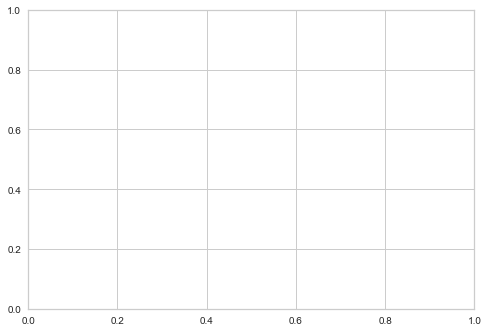

In [83]:
# %matplotlib notebook
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RandomForestClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

C:\Users\TreyG\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\TreyG\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F6671EE08>,
                   colormap=None, colors=None, is_fitted='auto', labels=None,
                   model=None, relative=True, stack=False, xlabel=None)

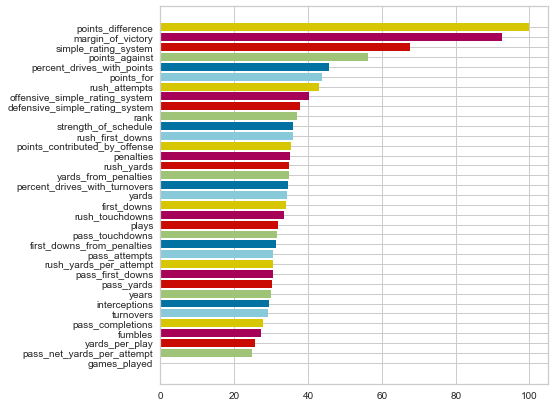

In [84]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz
set_palette('yellowbrick')
viz = FeatureImportances(rf, size=(500, 500))
viz.fit(X_train, y_train)

In [65]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'randomforest.sav'
joblib.dump(rf, 'randomforest.sav')

['randomforest.sav']